In [1]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from tqdm.notebook import tqdm
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num2class = ['incorrect_mask', 'mask1', 'mask2', 'mask3',
             'mask4', 'mask5', 'normal']
class2num = {k: v for v, k in enumerate(num2class)}

In [3]:
class cfg:
    data_dir = '/mnt/ssd/data/mask'
    img_dir = f'{data_dir}/resized_data'
    df_path = f'{data_dir}/metadata.csv'

In [4]:
df = pd.read_csv(cfg.df_path)
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


# Image Analysis

In [5]:
def get_ext(img_dir, img_id):
    filename = os.listdir(os.path.join(img_dir, img_id))[0]
    ext = os.path.splitext(filename)[-1].lower()
    return ext

In [6]:
def get_img_stats(img_dir, img_ids):
    img_info = dict(heights=[], widths=[], means=[], stds=[])
    for img_id in tqdm(img_ids):
        for path in glob(os.path.join(img_dir, img_id, '*')):
            img = np.array(Image.open(path))
            h, w, _ = img.shape
            img_info['heights'].append(h)
            img_info['widths'].append(w)
            img_info['means'].append(img.mean(axis=(0,1)))
            img_info['stds'].append(img.std(axis=(0,1)))
    return img_info

In [7]:
img_info = get_img_stats(cfg.img_dir, df.path.values)

print(f'Total number of people is {len(df)}')
print(f'Total number of images is {len(df) * 7}')

print(f'Minimum height for dataset is {np.min(img_info["heights"])}')
print(f'Maximum height for dataset is {np.max(img_info["heights"])}')
print(f'Average height for dataset is {int(np.mean(img_info["heights"]))}')
print(f'Minimum width for dataset is {np.min(img_info["widths"])}')
print(f'Maximum width for dataset is {np.max(img_info["widths"])}')
print(f'Average width for dataset is {int(np.mean(img_info["widths"]))}')

print(f'RGB Mean: {np.mean(img_info["means"], axis=0) / 255.}')
print(f'RGB Standard Deviation: {np.mean(img_info["stds"], axis=0) / 255.}')


Total number of people is 4500
Total number of images is 31500
Minimum height for dataset is 1024
Maximum height for dataset is 1024
Average height for dataset is 1024
Minimum width for dataset is 768
Maximum width for dataset is 768
Average width for dataset is 768
RGB Mean: [0.54839667 0.50429867 0.479506  ]
RGB Standard Deviation: [0.23727758 0.24700975 0.24638596]


## Class Histogram

In [8]:
img_dir = cfg.img_dir
img_id = df.iloc[13].path
ext = get_ext(cfg.img_dir, img_id)

Text(0.5, 1.0, 'Class Grayscale Histogram Plot')

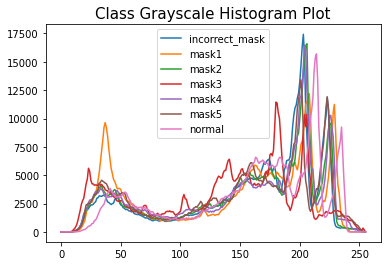

In [9]:
plt.figure()
plt.subplot(111)

for class_id in num2class:
    img = np.array(Image.open(os.path.join(img_dir, img_id, class_id+ext)).convert('L'))
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))
    sns.lineplot(data=histogram)

plt.legend(num2class)
plt.title('Class Grayscale Histogram Plot', fontsize=15)

Text(0.5, 1.0, 'Class Grayscale Histogram Plot')

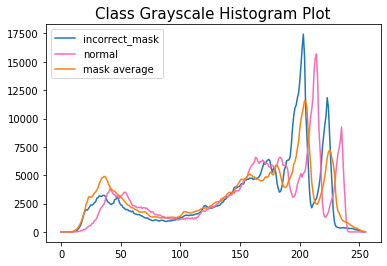

In [10]:
plt.figure()
plt.subplot(111)

img = np.array(Image.open(os.path.join(img_dir, img_id, 'incorrect_mask'+ext)).convert('L'))
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))
sns.lineplot(data=histogram)

img = np.array(Image.open(os.path.join(img_dir, img_id, 'normal'+ext)).convert('L'))
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))
sns.lineplot(data=histogram, color='hotpink')

histograms = []
for i in range(1, 6):
    img = np.array(Image.open(os.path.join(img_dir, img_id, num2class[i]+ext)).convert('L'))
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))
    histograms.append(histogram)
sns.lineplot(data=np.mean(histograms, axis=0))

plt.legend(['incorrect_mask', 'normal', 'mask average'])
plt.title('Class Grayscale Histogram Plot', fontsize=15)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RGB Histogram Plot - Normal')

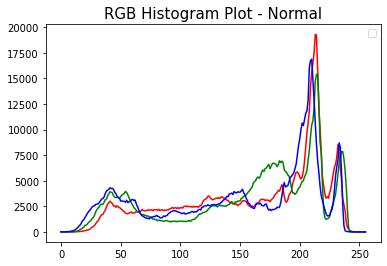

In [11]:
plt.figure()
plt.subplot(111)

img = np.array(Image.open(os.path.join(img_dir, img_id, 'normal'+ext)))
colormap = ['red', 'green', 'blue']
for i in range(3):
    histogram, bin_edges = np.histogram(img[..., i], bins=256, range=(0, 255))
    sns.lineplot(data=histogram, color=colormap[i])

plt.legend()
plt.title('RGB Histogram Plot - Normal', fontsize=15)

# Image Visualization

In [12]:
def plot_mask_images(img_dir, img_id):
    ext = get_ext(img_dir, img_id)
    imgs = [np.array(Image.open(os.path.join(img_dir, img_id, class_name + ext))) for class_name in num2class[:-1]]
    
    n_rows, n_cols = 2, 3
    fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(15, 12))
    for i in range(n_rows*n_cols):
        axes[i//(n_rows+1)][i%n_cols].imshow(imgs[i])
        axes[i//(n_rows+1)][i%n_cols].set_title(f'{num2class[i]}', color='r')
    plt.tight_layout()

In [13]:
def plot_raw_images(img_dir, img_id):
    ext = get_ext(img_dir, img_id)
    img = np.array(Image.open(os.path.join(img_dir, img_id, 'normal' + ext)))
    
    plt.figure(figsize=(6,6))
    plt.imshow(img)

In [14]:
img_id = df.iloc[13].path

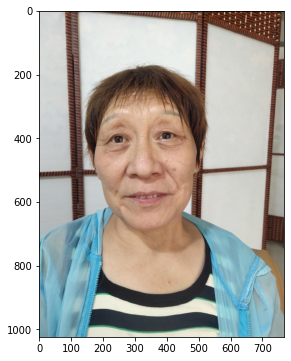

In [15]:
plot_raw_images(cfg.img_dir, img_id)

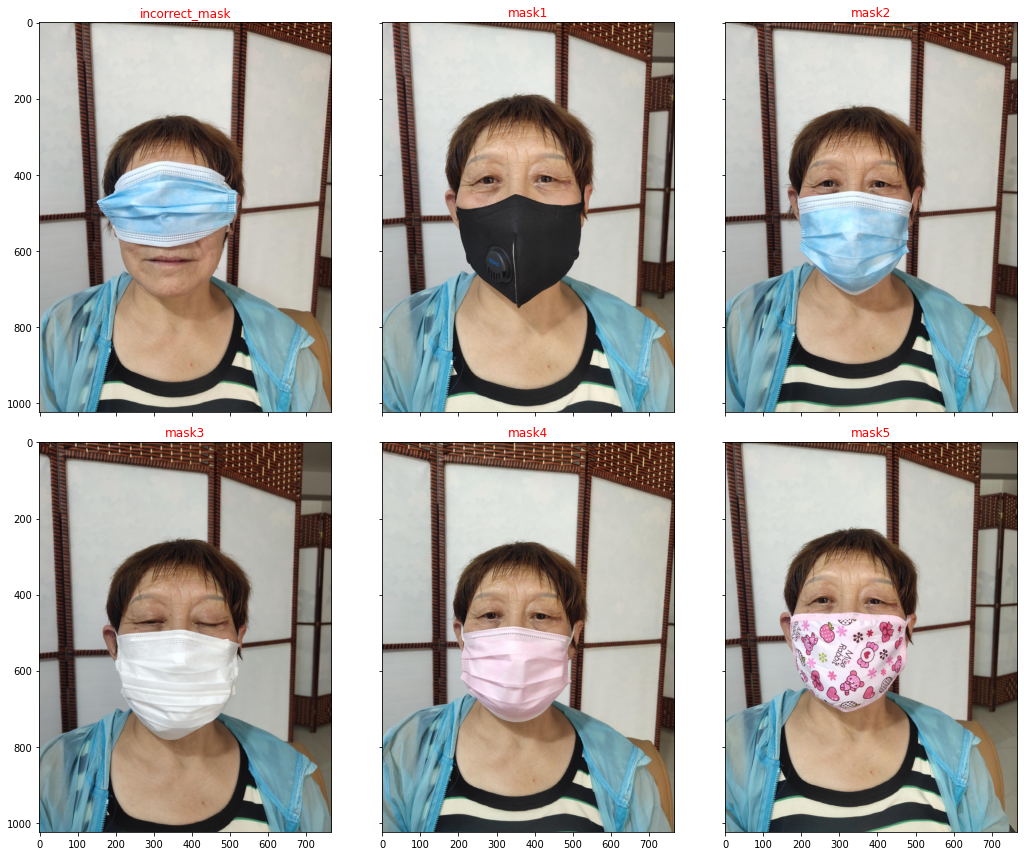

In [16]:
plot_mask_images(cfg.img_dir, img_id)

## Face Detection

In [17]:
img_dir = cfg.img_dir
img_id = df.iloc[13].path
ext = get_ext(cfg.img_dir, img_id)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [18]:
imgs = []
for class_id in num2class:
    img = np.array(Image.open(os.path.join(img_dir, img_id, class_id+ext)))
    imgs.append(img)
imgs = np.array(imgs)

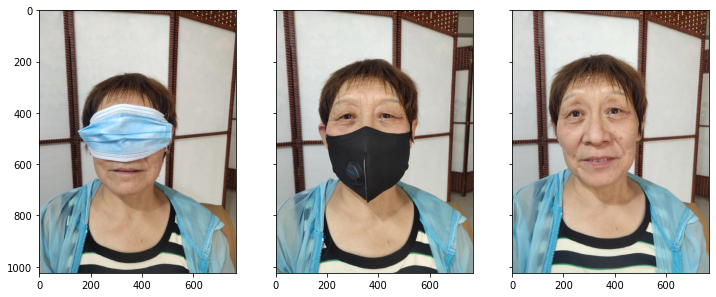

In [19]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 6))
axes[0].imshow(imgs[0])
axes[1].imshow(imgs[1])
axes[2].imshow(imgs[-1])

In [20]:
for img in imgs:
    face_bbox = face_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 1.1, 4)
    for (x, y, w, h) in face_bbox:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 4)

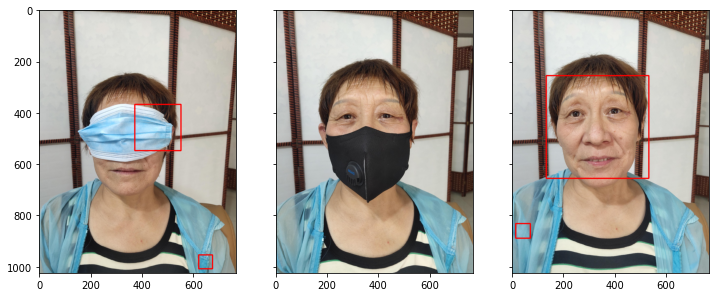

In [21]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 6))
axes[0].imshow(imgs[0])
axes[1].imshow(imgs[1])
axes[2].imshow(imgs[-1])

## PCA

In [22]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [23]:
n_imgs = 100

imgs = []
for img_id in df.path.values[:n_imgs]:
    for class_id in num2class:
        img = np.array(Image.open(os.path.join(img_dir, img_id, class_id+ext)).convert('L'))
        imgs.append(img)
imgs = np.array(imgs)
n_samples, h, w = imgs.shape

imgs = np.reshape(imgs, (n_samples, h*w))

In [24]:
n_components = 30

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(imgs)
print(f"pca is fitted in {time() - t0:.0f}s")
print(f'Explained variation per principal component: \n{pca.explained_variance_ratio_}')

eigenfaces = pca.components_.reshape((n_components, h, w))
img_pca = pca.transform(imgs)

pca is fitted in 25s
Explained variation per principal component: 
[0.16009361 0.10328633 0.07244428 0.05562406 0.03267057 0.02664162
 0.02361876 0.02276424 0.01980306 0.01656774 0.015396   0.01329425
 0.01265403 0.01160874 0.0111796  0.00935373 0.00806845 0.00769671
 0.0069821  0.00658239 0.00634341 0.00615533 0.00582116 0.00555431
 0.00537281 0.00508778 0.00468264 0.00459805 0.00431208 0.00416334]


### 천성 코멘트
- PCA할때 30개로 지정하는 것도 좋은데, 이론적으로 분산 80% 이상을 유지하는 부분 적용하면 좋을거같아요. sklearn은 n_components에 실수 넣으면 해당 값을 만족하는 최소 주성분을 잡아서 그렇게 수정하는게 어떨까용
    - 그런데 2차원이나 3차원으로 줄인다고하면 사실 의미가 없겠네요 ㅋㅋ 어차피 SVD로 뽑으면 앞에 2, 3개는 동일하게 나올테니. 그냥 이대로 유지해도 될듯합니다.
- 뭔가 이미지를 시각화 하는데에 pca로 주성분 몇개 뽑고, 다시 이미지 원복하는 eigen face 말씀드렸었는데, 강의 흐름상 갑자기 나오는 것 같아서 별로인 것 같기도하네요. 일단 현수님께서 작성은 하지 않으셨지만 지금 해두신 시각화로도 충반해보입니다.

In [25]:
pca_df = pd.DataFrame(img_pca, columns=[str(col) for col in range(n_components)])
pca_df['class_id'] = [num2class[n % len(num2class)] for n in range(n_samples)]
pca_df['class_id'] = pca_df['class_id'].map(lambda x: x if x in ['incorrect_mask', 'normal'] else 'mask')

In [26]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,class_id
0,-0.780906,-0.301056,0.909728,0.561226,0.377583,0.319517,0.490285,-0.159560,0.225842,-0.053525,...,1.407199,0.693648,1.012553,1.036119,0.260733,-0.573404,-0.006021,1.214846,-1.272902,incorrect_mask
1,-1.531605,0.055210,1.062817,0.447500,0.221038,0.130878,-0.149557,2.101871,2.522526,0.808643,...,-0.557722,-0.486676,-0.539305,-0.552513,1.172267,-0.669816,0.025176,0.391208,-0.514015,mask
2,-0.879607,-0.366105,0.961029,0.346568,0.148137,-0.002974,0.646121,-0.286992,0.415143,0.085475,...,1.001351,0.475874,0.437473,1.321931,-0.026431,-0.439004,-0.003119,1.043553,-0.557193,mask
3,-0.355493,-0.443534,1.248825,0.964822,0.401413,0.730866,0.595108,-0.244742,0.064300,0.277748,...,1.072093,-0.550130,0.280736,0.391420,-0.783343,-0.643769,-0.854202,0.843718,-0.141180,mask
4,-0.526200,-0.342052,1.049129,0.778329,0.344618,0.533895,0.592207,-0.188284,0.033061,0.085904,...,1.550561,0.076441,0.997500,0.762578,-0.294878,-0.958715,-0.615673,1.306256,-1.455102,mask


<AxesSubplot:xlabel='0', ylabel='1'>

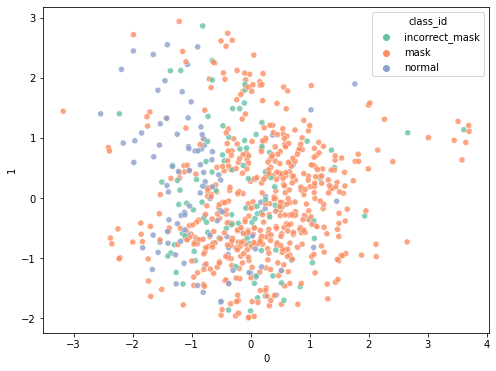

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='0', y='1',
    hue="class_id",
    data=pca_df,
    legend="full",
    palette=sns.color_palette("Set2", 3),
    alpha=0.8
)

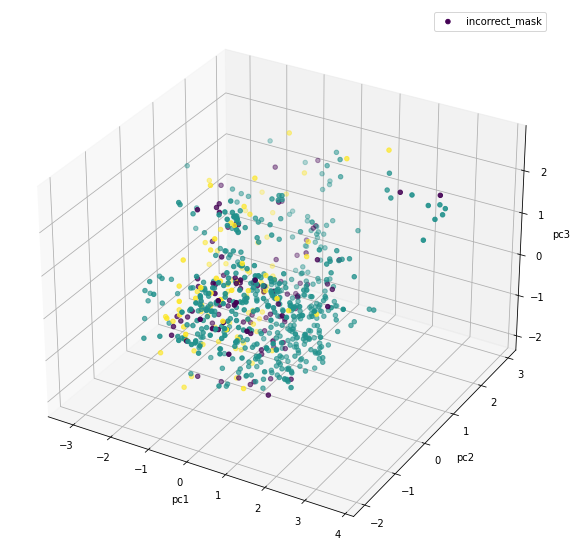

In [28]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
simplified_num2class = ['incorrect_mask', 'mask', 'normal']
simplified_class2num = {k: v for v, k in enumerate(simplified_num2class)}
ax.scatter(
    xs=pca_df["0"], 
    ys=pca_df["1"], 
    zs=pca_df["2"], 
    c=pca_df['class_id'].map(lambda x: simplified_class2num[x]), 
)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

plt.legend(simplified_num2class)
plt.show()

In [29]:
time_start = time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(img_pca)
print('t-SNE done! Time elapsed: {} seconds'.format(time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 700 samples in 0.000s...
[t-SNE] Computed neighbors for 700 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 700 / 700
[t-SNE] Mean sigma: 2.320969
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.667862
[t-SNE] KL divergence after 300 iterations: 1.235180
t-SNE done! Time elapsed: 0.6933977603912354 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

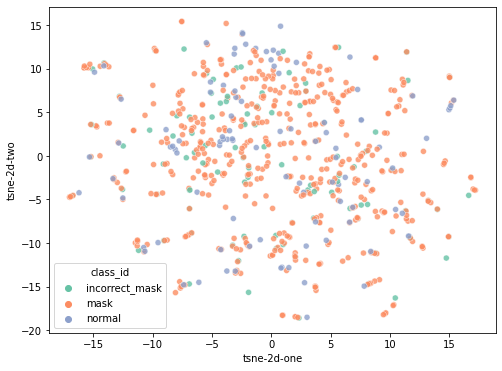

In [30]:
pca_df['tsne-2d-one'] = tsne_results[:,0]
pca_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class_id",
    palette=sns.color_palette("Set2", 3),
    data=pca_df,
    legend="full",
    alpha=0.8
)

### 천성 코멘트
- t-SNE도 시각화로 좋아요. 그런데 가끔 PCA랑 동일하게 전처리 단계의 차원 축소로 사용하려는 분들이 계시더라구요. t-SNE 특성상 매번 변환할 때 결과가 달라진다는 한계 때문에 전처리 단계에서 사용하기 어렵다 정도만 언급하면 좋겠습니다.

# Metadata Analysis

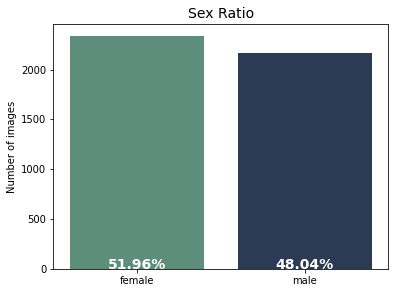

In [31]:
plt.figure(figsize=(6, 4.5)) 
ax = sns.countplot(x = 'gender', data = df, palette=["#55967e", "#263959"])

plt.xticks( np.arange(2), ['female', 'male'] )
plt.title('Sex Ratio',fontsize= 14)
plt.xlabel('')
plt.ylabel('Number of images')

counts = df['gender'].value_counts()
counts_pct = [f'{elem * 100:.2f}%' for elem in counts / counts.sum()]
for i, v in enumerate(counts_pct):
    ax.text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

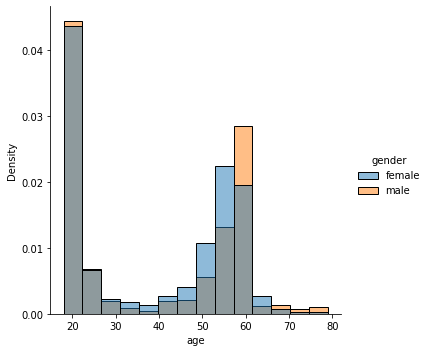

In [32]:
sns.displot(df, x="age", hue="gender", stat="density")

## Image Augmentation

In [33]:
from albumentations import *
from albumentations.pytorch import ToTensorV2

# Reference

- [Visualising high-dimensional datasets using PCA and t-SNE in Python](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)
- [Faces recognition example using eigenfaces and SVMs](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html)
- [Seaborn docs](https://seaborn.pydata.org/index.html)
- [Face Detection in 2 Minutes using OpenCV & Python](https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81)